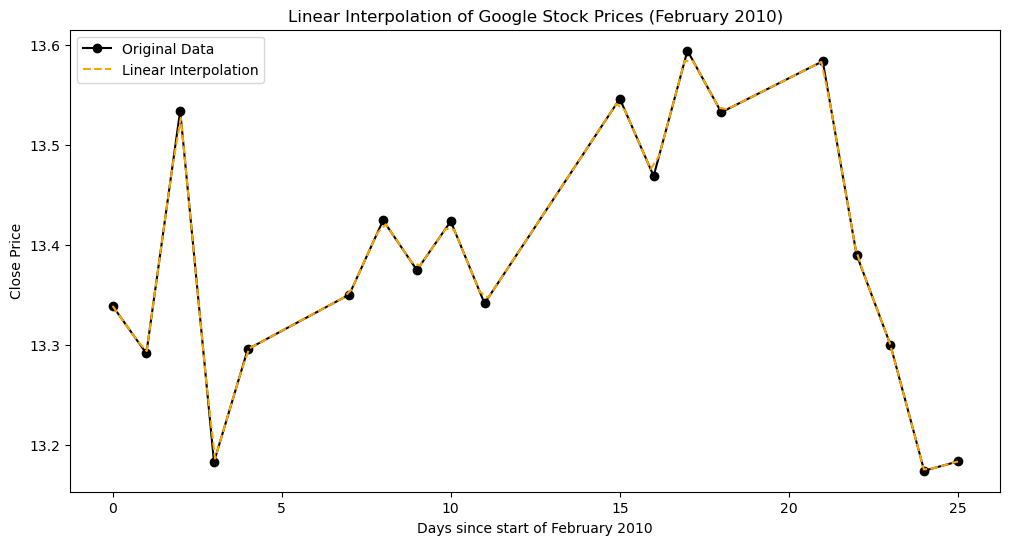

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Load the data
google_training_complete = pd.read_csv("Google_Stock_Train (2010-2022).csv")
google_training_complete['Date'] = pd.to_datetime(google_training_complete['Date'])

# Filter for February 2010
google_training_complete_feb_2010 = google_training_complete[
    (google_training_complete['Date'].dt.year == 2010) & 
    (google_training_complete['Date'].dt.month == 2)
]

# Extract control points: Use Date and Close price
control_points = google_training_complete_feb_2010[['Date', 'Close']].copy()
control_points['Date'] = (control_points['Date'] - control_points['Date'].min()).dt.days  # Convert to numerical days

# Convert to numpy arrays
x = control_points['Date'].to_numpy()
y = control_points['Close'].to_numpy()

# Create linear interpolation function
linear_interpolation = interp1d(x, y, kind='linear')

# Create new x values for interpolation
x_new = np.linspace(x.min(), x.max(), num=100)
y_new = linear_interpolation(x_new)

# Plotting
plt.figure(figsize=(12, 6))

# Plot original data
plt.plot(x, y, 'ko-', label='Original Data')  # Black solid line for original data
plt.plot(x_new, y_new, 'orange', linestyle='--', label='Linear Interpolation')  # Orange dotted line for interpolation
plt.xlabel('Days since start of February 2010')
plt.ylabel('Close Price')
plt.title('Linear Interpolation of Google Stock Prices (February 2010)')
plt.legend()
plt.show()

Hurst Exponent: 0.368098972525203
Fractal Dimension: 1.631901027474797


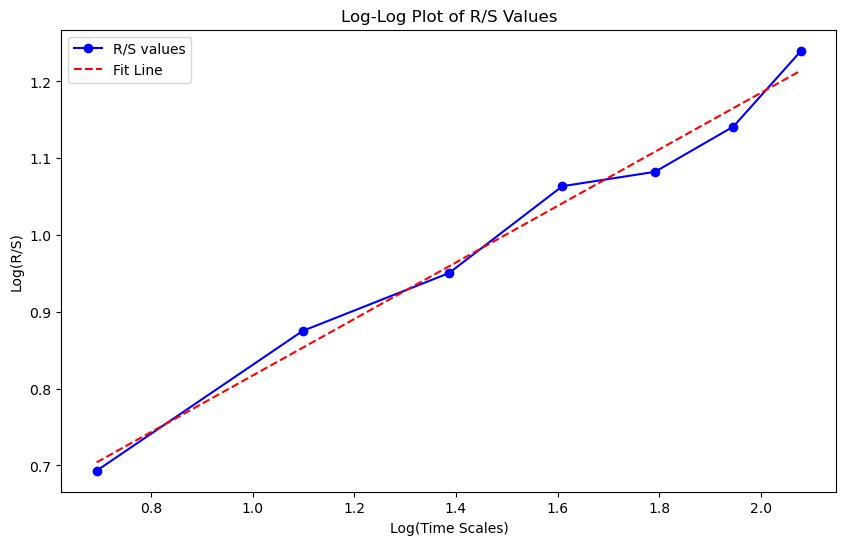

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.stats import linregress

# Load the data
google_training_complete = pd.read_csv("Google_Stock_Train (2010-2022).csv")
google_training_complete['Date'] = pd.to_datetime(google_training_complete['Date'])

# Filter for February 2010
google_training_complete_feb_2010 = google_training_complete[
    (google_training_complete['Date'].dt.year == 2010) & 
    (google_training_complete['Date'].dt.month == 2)
]

# Extract Close prices
close_prices = google_training_complete_feb_2010['Close'].values

# Calculate log returns
log_returns = np.log(close_prices[1:] / close_prices[:-1])

# Calculate the Hurst exponent using the Rescaled Range (R/S) method
def hurst_exponent(ts):
    N = len(ts)
    # Calculate the mean
    mean_ts = np.mean(ts)
    # Calculate the range
    R = np.max(ts) - np.min(ts)
    # Calculate the standard deviation
    s = np.std(ts)

    # Rescaled range
    return R / s

# Create a range of time scales
time_scales = np.arange(2, len(log_returns) // 2)

# Calculate R/S for each time scale
RS_values = []
for scale in time_scales:
    # Reshape the log returns into overlapping windows of 'scale'
    n_windows = len(log_returns) // scale
    R_S = []
    for i in range(n_windows):
        segment = log_returns[i*scale:(i+1)*scale]
        R_S.append(hurst_exponent(segment))
    RS_values.append(np.mean(R_S))

# Fit a line to the log-log plot
log_time_scales = np.log(time_scales)
log_RS_values = np.log(RS_values)

slope, intercept, r_value, p_value, std_err = linregress(log_time_scales, log_RS_values)
hurst_exponent = slope

# Calculate Fractal Dimension
fractal_dimension = 2 - hurst_exponent

# Print the results
print(f'Hurst Exponent: {hurst_exponent}')
print(f'Fractal Dimension: {fractal_dimension}')

# Optional: Plot the log-log plot
plt.figure(figsize=(10, 6))
plt.plot(log_time_scales, log_RS_values, 'bo-', label='R/S values')
plt.plot(log_time_scales, slope * log_time_scales + intercept, 'r--', label='Fit Line')
plt.xlabel('Log(Time Scales)')
plt.ylabel('Log(R/S)')
plt.title('Log-Log Plot of R/S Values')
plt.legend()
plt.show()